In [1]:
import warnings;
warnings.simplefilter('ignore')

import pandas as pd
data = pd.read_csv("aylk-su-tuketimi-verisi.csv")
data.head(5)

,tarih,aylik_su_tuketimi_m3
0,01/01/2010,60626396
1,01/02/2010,55607348
2,01/03/2010,60690331
3,01/04/2010,60059862
4,01/05/2010,68130651


In [2]:
!pip install pystan fbprophet

In [16]:
from fbprophet import Prophet

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tarih                 141 non-null    object
 1   aylik_su_tuketimi_m3  141 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [5]:
data.columns

Index(['tarih', 'aylik_su_tuketimi_m3'], dtype='object')

In [6]:
data["year"]= data["tarih"].apply(lambda x: str(x)[-4:])
data["day"]= data["tarih"].apply(lambda x: str(x)[-10:-8])
data["month"]= data["tarih"].apply(lambda x: str(x)[-7:-5])

In [7]:
data["ds"] = pd.DatetimeIndex(data["year"] + "-" + data["month"] + "-" + data["day"])

In [8]:
data.head(5)

,tarih,aylik_su_tuketimi_m3,year,day,month,ds
0,01/01/2010,60626396,2010,01,01,2010-01-01
1,01/02/2010,55607348,2010,01,02,2010-02-01
2,01/03/2010,60690331,2010,01,03,2010-03-01
3,01/04/2010,60059862,2010,01,04,2010-04-01
4,01/05/2010,68130651,2010,01,05,2010-05-01


In [9]:
data.dtypes

tarih                           object
aylik_su_tuketimi_m3             int64
year                            object
day                             object
month                           object
ds                      datetime64[ns]
dtype: object

In [10]:
data.drop(["tarih","year","month","day"],axis=1,inplace=True)

In [11]:
data.rename(columns = {'aylik_su_tuketimi_m3':'y'}, inplace = True)

In [12]:
data.head(5)

,y,ds
0,60626396,2010-01-01
1,55607348,2010-02-01
2,60690331,2010-03-01
3,60059862,2010-04-01
4,68130651,2010-05-01


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


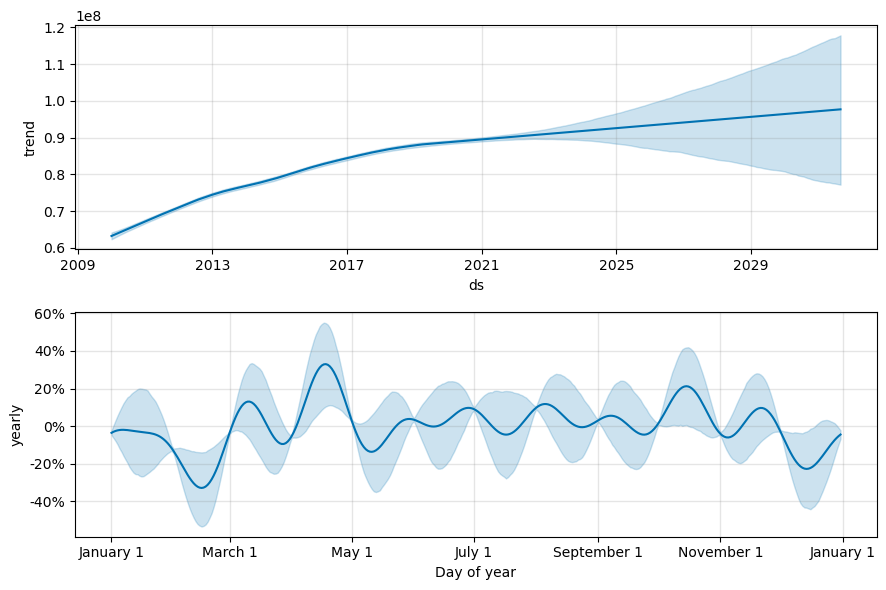

In [13]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(data)
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot_components(fcst)

In [14]:
fcst[:12]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2010-01-01,6.320920e+07,5.854159e+07,6.323588e+07,6.231883e+07,6.414725e+07,-0.037171,-0.046635,-0.027856,-0.037171,-0.046635,-0.027856,0.0,0.0,0.0,6.085963e+07
1,2010-02-01,6.354515e+07,5.310076e+07,5.750899e+07,6.271477e+07,6.441042e+07,-0.128093,-0.136971,-0.118652,-0.128093,-0.136971,-0.118652,0.0,0.0,0.0,5.540548e+07
2,2010-03-01,6.384860e+07,5.907259e+07,6.345826e+07,6.307978e+07,6.463934e+07,-0.042247,-0.051619,-0.032696,-0.042247,-0.051619,-0.032696,0.0,0.0,0.0,6.115121e+07
3,2010-04-01,6.418456e+07,5.831368e+07,6.271616e+07,6.349053e+07,6.493747e+07,-0.057093,-0.065172,-0.049261,-0.057093,-0.065172,-0.049261,0.0,0.0,0.0,6.052008e+07
4,2010-05-01,6.450968e+07,6.454082e+07,6.901329e+07,6.385638e+07,6.520193e+07,0.035289,0.026665,0.044356,0.035289,0.026665,0.044356,0.0,0.0,0.0,6.678614e+07
5,2010-06-01,6.484843e+07,6.493686e+07,6.930961e+07,6.423763e+07,6.550846e+07,0.034982,0.026467,0.043010,0.034982,0.026467,0.043010,0.0,0.0,0.0,6.711695e+07
6,2010-07-01,6.517626e+07,6.912284e+07,7.342671e+07,6.459274e+07,6.580643e+07,0.091603,0.082504,0.100712,0.091603,0.082504,0.100712,0.0,0.0,0.0,7.114658e+07
7,2010-08-01,6.551501e+07,6.945208e+07,7.405335e+07,6.492401e+07,6.610558e+07,0.095262,0.086657,0.104058,0.095262,0.086657,0.104058,0.0,0.0,0.0,7.175608e+07
8,2010-09-01,6.585376e+07,6.564450e+07,6.979666e+07,6.527645e+07,6.645718e+07,0.029009,0.021254,0.036788,0.029009,0.021254,0.036788,0.0,0.0,0.0,6.776414e+07
9,2010-10-01,6.618159e+07,6.473467e+07,6.896086e+07,6.561803e+07,6.677203e+07,0.009932,0.001160,0.019486,0.009932,0.001160,0.019486,0.0,0.0,0.0,6.683887e+07


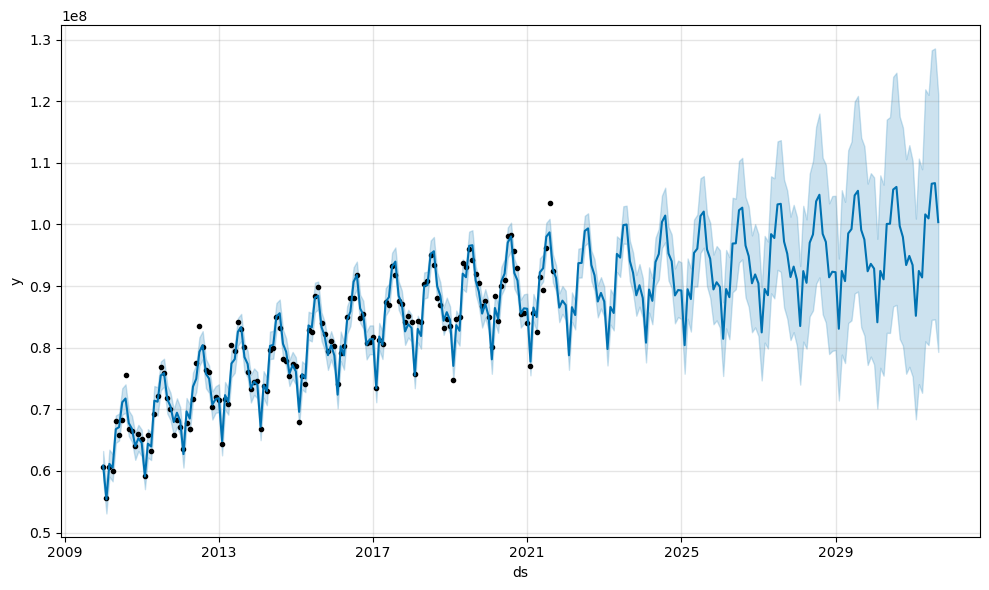

In [15]:
plot2 = m.plot(fcst)